<a href="https://colab.research.google.com/github/bellington90/class-python-projects/blob/main/project2/python_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv"
df = pd.read_csv(url)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
import numpy as np

df = df.replace("?", np.nan)

In [4]:
(df == "?").sum().sum()

np.int64(0)

In [5]:
df["race"].value_counts()

,count
race,
Caucasian,76099
AfricanAmerican,19210
Hispanic,2037
Other,1506
Asian,641


In [6]:
df["readmitted"].value_counts()
df["readmitted"].value_counts(normalize=True) * 100

,proportion
readmitted,
NO,53.911916
>30,34.928169
<30,11.159916


In [7]:
group_df = df[df["race"] == "AfricanAmerican"]
group_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),NaN,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
11,36900,77391171,AfricanAmerican,Male,[60-70),NaN,2,1,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
14,62256,49726791,AfricanAmerican,Female,[60-70),NaN,3,1,2,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
15,73578,86328819,AfricanAmerican,Male,[60-70),NaN,1,3,7,12,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
group_df["readmitted"].value_counts(normalize=True)
df["readmitted"].value_counts(normalize=True)

,proportion
readmitted,
NO,0.539119
>30,0.349282
<30,0.111599


In [10]:
group_df["time_in_hospital"].describe()

,time_in_hospital
count,19210.000000
mean,4.507860
std,3.047589
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


In [11]:
df["time_in_hospital"].describe()

,time_in_hospital
count,101766.000000
mean,4.395987
std,2.985108
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


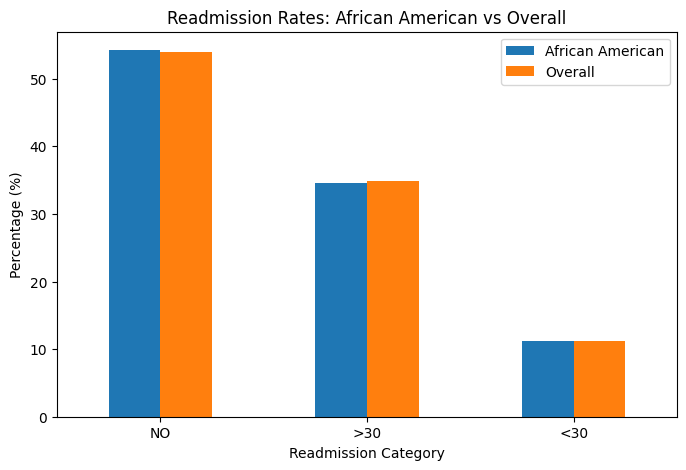

In [12]:
import matplotlib.pyplot as plt

# Readmission counts for AA group
aa_readmit = group_df["readmitted"].value_counts(normalize=True) * 100

# Readmission counts for overall dataset
overall_readmit = df["readmitted"].value_counts(normalize=True) * 100

# Combine into one DataFrame for easy plotting
readmit_compare = pd.DataFrame({
    "African American": aa_readmit,
    "Overall": overall_readmit
})

readmit_compare.plot(kind="bar", figsize=(8,5))
plt.title("Readmission Rates: African American vs Overall")
plt.ylabel("Percentage (%)")
plt.xlabel("Readmission Category")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-333324015.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


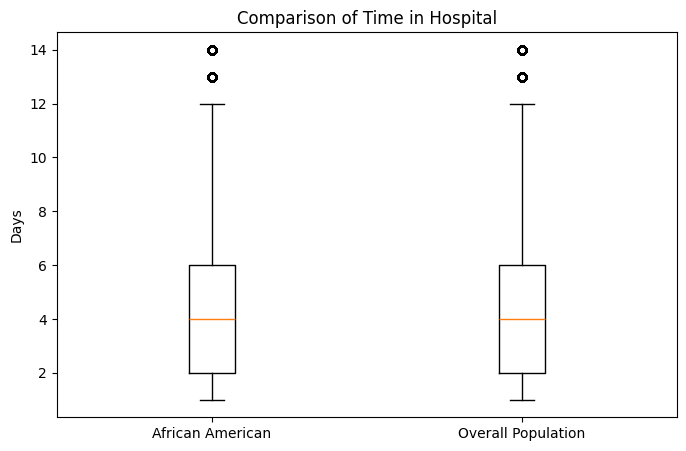

In [13]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [
        group_df["time_in_hospital"].dropna(),
        df["time_in_hospital"].dropna()
    ],
    labels=["African American", "Overall Population"]
)
plt.title("Comparison of Time in Hospital")
plt.ylabel("Days")
plt.show()

This analysis showed that African American patients in this dataset had readmission patterns and hospital stays that were very similar to the overall patient population. The descriptive statistics and visualizations did not reveal major differences between the groups for the measures examined. These findings suggest that for the variables explored here, the outcomes were consistent across the selected subgroup and the dataset as a whole.